In [1]:
import warnings
warnings.filterwarnings('ignore')

In [69]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [46]:
def plot_points(X, y, color = "b.", label=None):
    plt.plot(X, y, color, label=label)
    plt.legend()

In [4]:
def plot_poly_reg(X, y, coefs, intercept, color='r-'):    
    X_hat = np.sort(X, axis=0)
    y_hat = np.full(len(X_hat), intercept).reshape(-1, 1)
    for power, coef in enumerate(coefs):
        X_coef = X_hat**(power+1) * coef
        y_hat += X_coef
    plot_points(X_hat, y_hat, color)

In [5]:
def plot_learning_curves(model, X, y, title=None):
    Xt, Xv, yt, yv = train_test_split(X, y, random_state = 12)
    train_errors, val_errors = [], []
    for m in range(5, len(Xt)):
        model.fit(Xt[:m], yt[:m])
        yt_predict = model.predict(Xt[:m])
        yv_predict = model.predict(Xv)
        train_errors.append(mean_squared_error(yt_predict, yt[:m]))
        val_errors.append(mean_squared_error(yv_predict, yv))
    plt.plot(np.sqrt(train_errors), 'r-', label='Training set')
    plt.plot(np.sqrt(val_errors), 'b-', label='Validation set')
    plt.title(title)
    plt.legend()
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.show()

In [6]:
def plot_poly_model(X, y, alphas=[0], degree=1, model = Ridge()):
    poly_fea = PolynomialFeatures(degree=degree, include_bias=False)
    Xpoly = poly_fea.fit_transform(X)
    for alpha in alphas:
        model_reg = model
        model_reg.alpha = alpha
        model_reg.fit(Xpoly, y)
        y_pred = model_reg.predict(Xpoly)
        coefs = model_reg.coef_
        coefs = coefs if len(coefs.shape) == 1 else coefs[0]
        plot_poly_reg(X, y_pred, coefs, model_reg.intercept_)
    plt.show()

In [7]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

## Linear regression

In [8]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.59239448],
       [2.93668154]])

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.59239448]), array([[2.93668154]]))

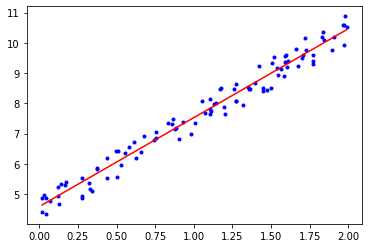

In [10]:
plot_points(X, y)
plot_poly_reg(X, y, lin_reg.coef_[0], lin_reg.intercept_)

## Gradient descent

### Batch gradient descent

array([[4.59239448],
       [2.93668154]])

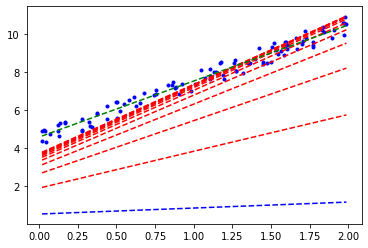

In [11]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.rand(2, 1)

plot_points(X, y)
plot_poly_reg(X, y, theta[1], theta[0], 'b--')    

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta -= eta * gradients
    if(iteration < 10):
        plot_poly_reg(X, y, theta[1], theta[0], 'r--')    
        
plot_poly_reg(X, y, theta[1], theta[0], 'g--')    
theta

### Stochastic gradient descent

array([[4.60111479],
       [2.93586128]])

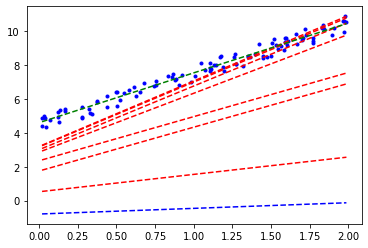

In [12]:
def learning_schedule(t):
    return t0 / (t + t1)

n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
theta = np.random.randn(2,1) # random initialization

plot_points(X, y)
plot_poly_reg(X, y, theta[1], theta[0], 'b--')    

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
        if(epoch == 0 and i < 7):
            plot_poly_reg(X, y, theta[1], theta[0], 'r--')    
            
plot_poly_reg(X, y, theta[1], theta[0], 'g--')    
theta

(array([4.59123569]), array([2.93473428]))

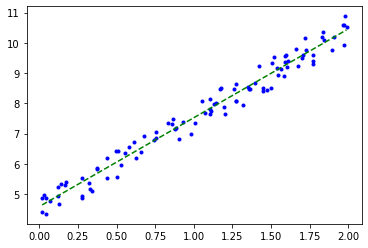

In [13]:
sgd_reg = SGDRegressor(n_iter_no_change=100, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
plot_points(X, y)
plot_poly_reg(X, y, sgd_reg.coef_, sgd_reg.intercept_, 'g--')    
sgd_reg.intercept_, sgd_reg.coef_

### Mini-batch gradient descent

## Polynomial regression

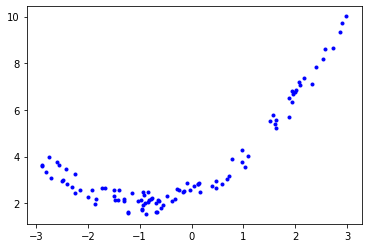

In [14]:
n_points = 100
X = 6 * np.random.rand(n_points, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.rand(n_points, 1)
plot_points(X, y)

In [15]:
poly_fea = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_fea.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.53400065]), array([[1.00586359, 0.5014444 ]]))

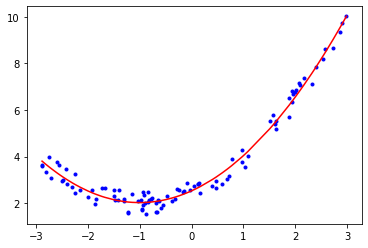

In [16]:
plot_points(X, y)
plot_poly_reg(X, y, lin_reg.coef_[0], lin_reg.intercept_)

In [17]:
poly_fea = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_fea.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.53139297]), array([[0.99512319, 0.50195901, 0.00205404]]))

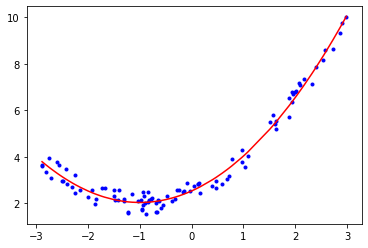

In [18]:
plot_points(X, y)
plot_poly_reg(X, y, lin_reg.coef_[0], lin_reg.intercept_)

In [19]:
poly_lin_reg = Pipeline((
    ('poly_fea', PolynomialFeatures(degree=2, include_bias=False)),
    ('lin_reg', LinearRegression()),
))

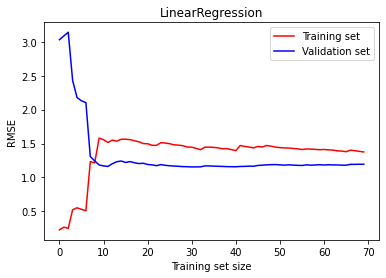

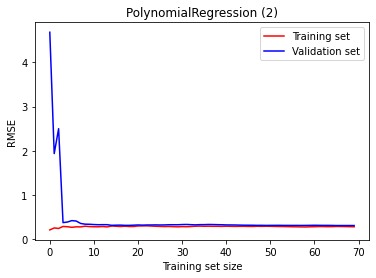

In [20]:
plot_learning_curves(LinearRegression(), X, y, 'LinearRegression')
plot_learning_curves(poly_lin_reg, X, y, 'PolynomialRegression (2)')

## Regularized linear models

### Ridge regression

In [21]:
X = 2 * np.random.rand(30, 1)
y = 4 + 3 * X + 3 * np.random.rand(30, 1)

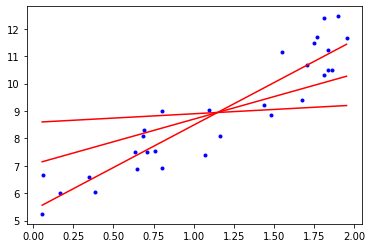

In [22]:
plot_points(X, y)
plot_poly_model(X, y, alphas=[0, 10, 100], model=Ridge())

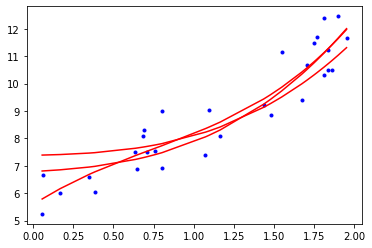

In [23]:
plot_points(X, y)
plot_poly_model(X, y, alphas=[0, 10, 100], degree=3, model=Ridge())

### Lasso regression
#### Least Absolute Shrinkage and Selection Operator Regression

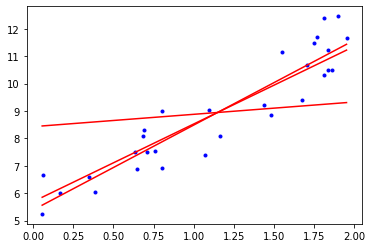

In [24]:
plot_points(X, y)
plot_poly_model(X, y, alphas=[0, 0.1, 1], model=Lasso())

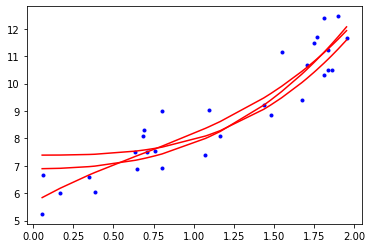

In [25]:
plot_points(X, y)
plot_poly_model(X, y, alphas=[0, 0.1, 1], model=Lasso(), degree=3)

### Elastic net
#### Ridge and Lasso mix

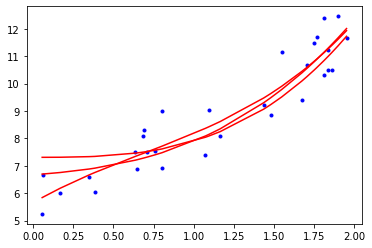

In [26]:
plot_points(X, y)
plot_poly_model(X, y, alphas=[0, 0.1, 1], model=ElasticNet(l1_ratio=0.5), degree=3)

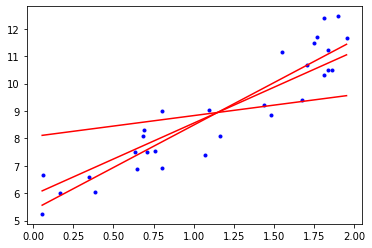

In [27]:
plot_points(X, y)
plot_poly_model(X, y, alphas=[0, 0.1, 1], model=ElasticNet(l1_ratio=0.5))

## Logistic regression

In [28]:
iris = datasets.load_iris()
X = iris['data'][:, 3:] # petal width
y = (iris['target'] == 2).astype(np.int) # 1 if Virginica else 0

In [29]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

array([1.66066066])

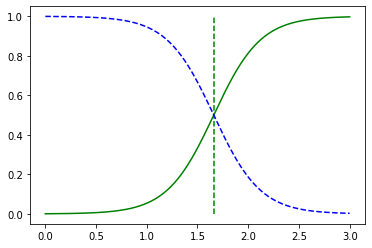

In [30]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
mid_point = X_new[np.abs(y_proba[:, 0] - y_proba[:, 1]) < 0.01]
mid_point = mid_point[int(len(mid_point)/2)]
plt.plot([mid_point, mid_point], [[0], [1]], 'g--')
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
mid_point

### Softmax regression

In [70]:
X = iris['data'][:, (2, 3)] # petal length and width
y = iris['target']
Xt, Xv, yt, yv = train_test_split(X, y, random_state=12)
softmax_reg = LogisticRegression(multi_class='multinomial')
softmax_reg.fit(Xt, yt)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

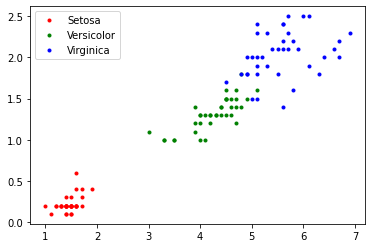

In [71]:
plot_points(Xt[yt==0][:, 0], Xt[yt==0][:, 1], 'r.', label='Setosa')
plot_points(Xt[yt==1][:, 0], Xt[yt==1][:, 1], 'g.', label='Versicolor')
plot_points(Xt[yt==2][:, 0], Xt[yt==2][:, 1], 'b.', label='Virginica')

In [72]:
print(accuracy_score(softmax_reg.predict(Xt), yt))
print(accuracy_score(softmax_reg.predict(Xv), yv))

0.9642857142857143
0.9736842105263158
